In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [4]:
# nation_position, club_position, player_positions
df = pd.read_csv('players_22.csv', low_memory=False)

# selecting column
df = df[['short_name', 'age', 'nationality_name', 'overall', 'potential',
         'club_name', 'value_eur', 'wage_eur', 'player_positions']]

# selecting only one position
df['player_positions'] = df['player_positions'].str.split(',', expand=True)[0]

# dropping nan
df.dropna(inplace=True)

In [5]:
players_missing_worldcup = ['K. Benzema', 'S. Mané', 'S. Agüero', 'Sergio Ramos', 'P. Pogba',
                            'M. Reus', 'Diogo Jota', 'A. Harit', 'N. Kanté', 'G. Lo Celso', 'Piqué']

# dropping injured players
drop_index = df[df['short_name'].isin(players_missing_worldcup)].index
df.drop(drop_index, axis=0, inplace=True)

In [6]:
teams_worldcup = [
    'Qatar', 'Brazil', 'Belgium', 'France', 'Argentina', 'England', 'Spain', 'Portugal',
    'Mexico', 'Netherlands', 'Denmark', 'Germany', 'Uruguay', 'Switzerland', 'United States', 'Croatia',
    'Senegal', 'Iran', 'Japan', 'Morocco', 'Serbia', 'Poland', 'South Korea', 'Tunisia',
    'Cameroon', 'Canada', 'Ecuador', 'Saudi Arabia', 'Ghana', 'Wales', 'Costa Rica', 'Australia'
]

# filtering only national teams in the world cup
df = df[df['nationality_name'].isin(teams_worldcup)]

In [7]:
# best players
df.sort_values(by=['overall', 'potential', 'value_eur'], ascending=False, inplace=True)

Distribution of players overall

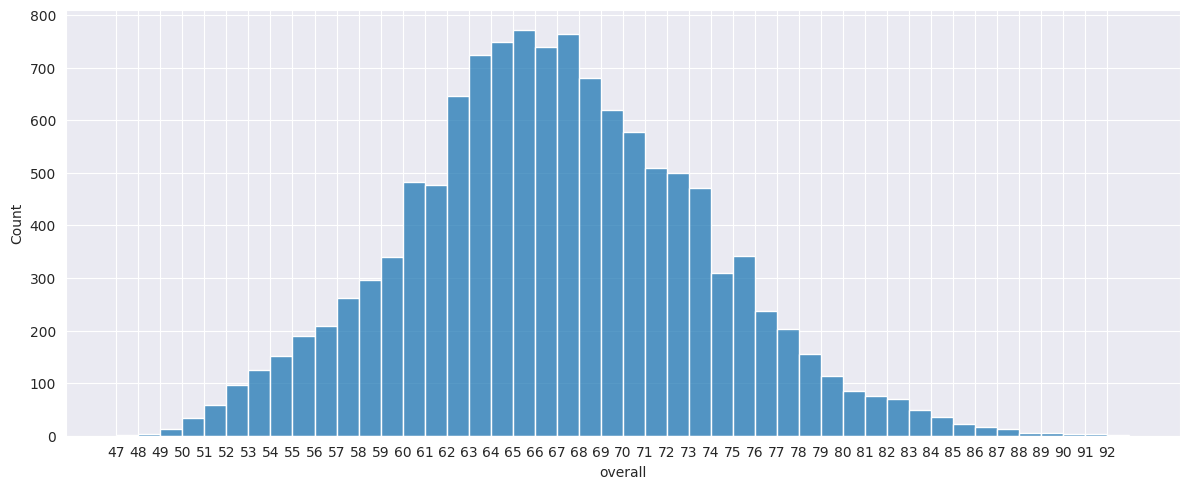

In [8]:
import numpy as np
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

sns.histplot(df, x='overall', binwidth=1)

bins = np.arange(df['overall'].min(), df['overall'].max(), 1)
plt.xticks(bins)
plt.show()

Dream Team World Cup Players


In [9]:
df.drop_duplicates('player_positions')
# viz -> https://trinket.io/python/0813ea96f6

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
8,M. ter Stegen,29,Germany,90,92,FC Barcelona,99000000.0,250000.0,GK
19,J. Kimmich,26,Germany,89,90,FC Bayern München,108000000.0,160000.0,CDM
15,V. van Dijk,29,Netherlands,89,89,Liverpool,86000000.0,230000.0,CB
28,Bruno Fernandes,26,Portugal,88,89,Manchester United,107500000.0,250000.0,CAM
44,T. Alexander-Arnold,22,England,87,92,Liverpool,114000000.0,150000.0,RB
45,J. Sancho,21,England,87,91,Manchester United,116500000.0,150000.0,RM


The Most Skillful Players on each National Team


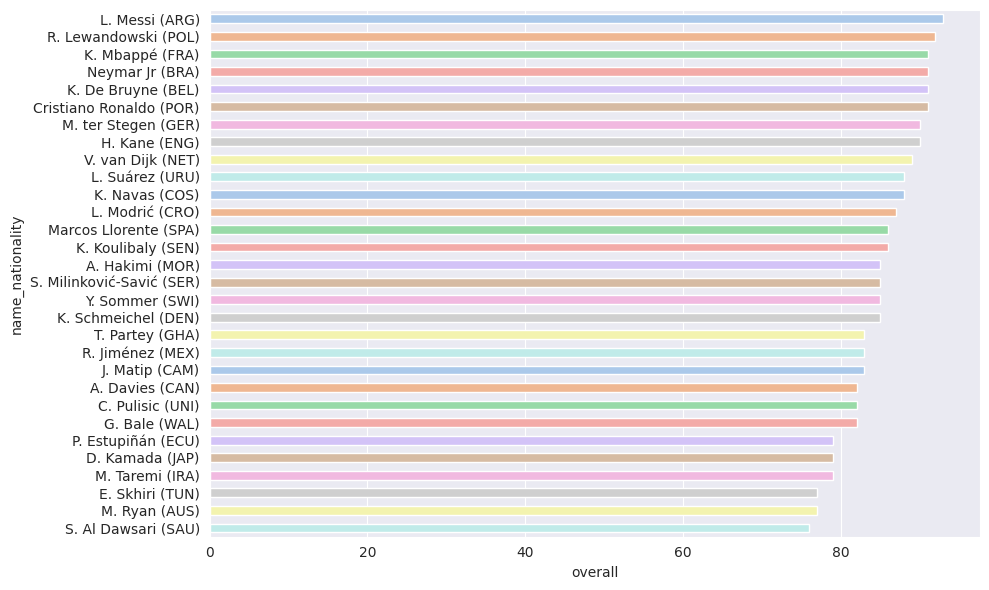

In [10]:
df_best_players = df.copy()
df_best_players = df_best_players.drop_duplicates('nationality_name').reset_index(drop=True)
country_short =  df_best_players['nationality_name'].str.extract('(^\w{3})', expand=False).str.upper()
df_best_players['name_nationality'] = df_best_players['short_name'] +' (' + country_short + ')'

fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

sns.barplot(df_best_players, x='overall', y='name_nationality',
            palette=sns.color_palette('pastel'), width=0.5)
plt.show()

Best Squad per Team

In [11]:
def best_squad(nationality):
    df_best_squad = df.copy()
    df_best_squad = df_best_squad.groupby(['nationality_name', 'player_positions']).head(2)
    df_best_squad = df_best_squad[df_best_squad['nationality_name']==nationality].sort_values(['player_positions', 'overall', 'potential'], ascending=False)
    return df_best_squad

In [14]:
best_squad('Tunisia')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
1199,W. Khazri,30,Tunisia,76,76,AS Saint-Étienne,7500000.0,33000.0,ST
3286,Y. Touzghar,34,Tunisia,72,72,ESTAC Troyes,1100000.0,15000.0,ST
9991,S. Khelifi,27,Tunisia,65,65,FC Zürich,750000.0,5000.0,RM
12246,C. Ben Saada,37,Tunisia,63,63,SC Bastia,160000.0,1000.0,RM
5400,A. Abdi,27,Tunisia,70,71,Stade Malherbe Caen,1700000.0,4000.0,RB
6182,M. Dräger,25,Tunisia,69,74,Nottingham Forest,1900000.0,19000.0,RB
6186,A. Layouni,28,Tunisia,69,69,Vålerenga Fotball,1400000.0,3000.0,LW
1627,N. Sliti,28,Tunisia,75,75,Ettifaq FC,5500000.0,29000.0,LM
8194,B. Srarfi,24,Tunisia,67,72,SV Zulte Waregem,1500000.0,5000.0,LM
8950,A. Ben Mohamed,26,Tunisia,66,67,Le Havre AC,925000.0,3000.0,LB


In [15]:
average_overall = [best_squad(team)['overall'].mean() for team in teams_worldcup]

df_average_overall = pd.DataFrame({'Teams': teams_worldcup, 'AVG_Overall': average_overall})
df_average_overall = df_average_overall.dropna()
df_average_overall = df_average_overall.sort_values('AVG_Overall', ascending=False)
df_average_overall

,Teams,AVG_Overall
6,Spain,82.400000
7,Portugal,81.733333
5,England,81.700000
1,Brazil,81.666667
3,France,81.000000
4,Argentina,80.566667
11,Germany,80.433333
2,Belgium,79.034483
9,Netherlands,78.758621
8,Mexico,77.727273


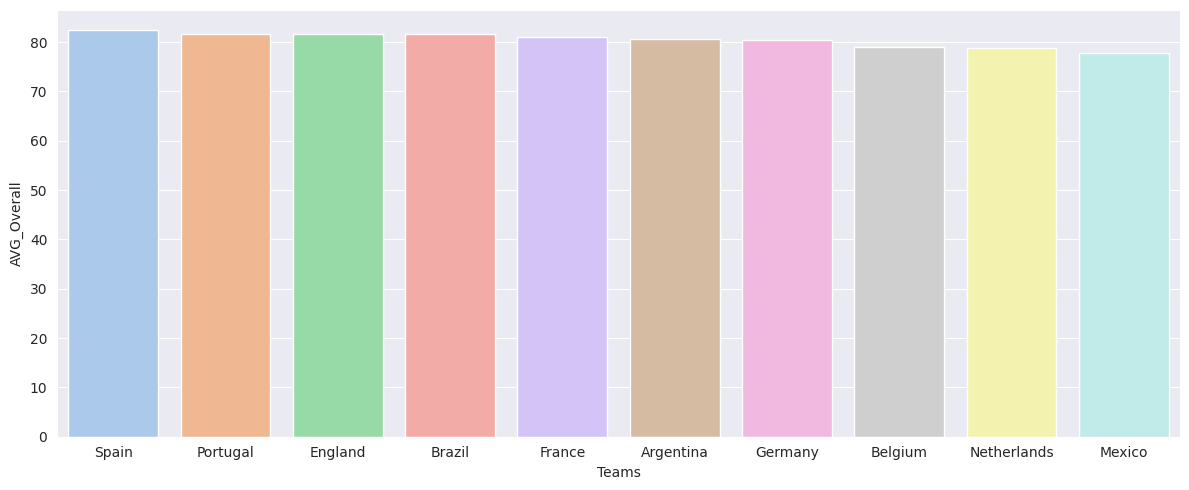

In [16]:
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

sns.barplot(df_average_overall[:10], x='Teams', y='AVG_Overall',
            palette=sns.color_palette('pastel'))
plt.show()

Best Formation for each team

In [17]:
def best_lineup(nationality, lineup):
    lineup_count = [lineup.count(i) for i in lineup]

    df_lineup = pd.DataFrame({'position': lineup, 'count': lineup_count})
    positions_non_repeated = df_lineup[df_lineup['count'] <= 1]['position'].values
    positions_repeated = df_lineup[df_lineup['count'] > 1]['position'].values

    df_squad = best_squad(nationality)

    df_lineup = pd.concat([
        df_squad[df_squad['player_positions'].isin(positions_non_repeated)].drop_duplicates('player_positions', keep='first'),
        df_squad[df_squad['player_positions'].isin(positions_repeated)]]
    )
    return df_lineup[['short_name', 'overall', 'club_name', 'player_positions']]

In [18]:
dict_formation = {
    '4-3-3': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW'],
    '4-4-2': ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST'],
    '4-2-3-1': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST'],
}

In [19]:
for index, row in df_average_overall[:9].iterrows():
    max_average = None
    for key, values in dict_formation.items():
        average = best_lineup(row['Teams'], values)['overall'].mean()
        if max_average is None or average>max_average:
            max_average = average
            formation = key
    print(row['Teams'], formation, max_average)

Spain 4-2-3-1 85.1
Portugal 4-2-3-1 84.9
England 4-4-2 84.45454545454545
Brazil 4-3-3 84.81818181818181
France 4-2-3-1 83.9
Argentina 4-3-3 83.54545454545455
Germany 4-2-3-1 84.1
Belgium 4-3-3 82.54545454545455
Netherlands 4-4-2 82.54545454545455


In [24]:
# best_lineup('Spain', dict_formation['4-2-3-1'])
# best_lineup('Argentina', dict_formation['4-3-3'])
best_lineup('Canada', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
7277,T. Buchanan,68,New England Revolution,RM
4328,R. Laryea,71,Toronto FC,RB
3175,J. Hoilett,72,Reading,LM
274,A. Davies,82,FC Bayern München,LB
2695,M. Crépeau,73,Vancouver Whitecaps FC,GK
848,J. David,78,LOSC Lille,ST
1798,C. Larin,75,Beşiktaş JK,ST
2473,S. Arfield,73,Rangers FC,CM
3379,J. Osorio,72,Toronto FC,CM
4762,D. Henry,70,Suwon Samsung Bluewings,CB
